# Voitures par commune

Ce jeu de données permet de visualiser l’évolution trimestrielle (à partir de de T4 2020) du stock de voitures immatriculées dans chaque commune de France métropolitaine et DOM.

Ces voitures sont aussi ventilées sur deux axes :

* Nécessitent-elles une borne de recharge électrique
* Nécessitent-elles une borne de recharge gaz

La maille géographique est la maille communale (CODE INSEE), et, à titre informatif la maille EPCI (Etablissement Publics de Coopération Intercommunale) est également disponible.


**Source:** https://www.agenceore.fr/opendata/voitures-particulieres-immatriculees-par-commune-et-par-type-de-recharge

In [2]:
import geopandas as gpd

FILE = "_data_cache/voitures-par-commune-par-energie.geojson"
df = gpd.read_file(FILE)

In [23]:
COBAN=[
    "33284", #'MIOS',
    "33555", #'MARCHEPRIME',
    "33051",# 'BIGANOS',
    "33019", # 'AUDENGE',
    "33229", # 'LANTON',
    "33005", # 'ANDERNOS-LES-BAINS',
    "33011", # 'ARES',
    "33236", #'LEGE-CAP-FERRET',
    ]

VAL_DE_L_EYRE = [
    "33042", # 'BELIN-BELIET',
    "33029", # 'LE BARP',
    "33260", # 'LUGOS',
    "33436", # 'SAINT-MAGNE',
    "33498", # 'SALLES',
    ]

COBAS = [
    "33009", # 'ARCACHON',
    "33199", # 'GUJAN-MESTRAS',
    "33529", # 'LA TESTE-DE-BUCH',
    "33527", # 'LE TEICH'
    ]
    
SYBARVAL = COBAN + COBAS + VAL_DE_L_EYRE

In [24]:
df_sybarval = df[df["codgeo"].isin(SYBARVAL)].sort_values(by="date_arrete")

df_sybarval.head()

,nb_vp_rechargeables_gaz,codgeo,date_arrete,epci,nb_vp_rechargeables_el,libgeo,nb_vp,libepci,geometry
244055,1,33019,2020-12-31,243301504,47,AUDENGE,9291,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-0.83743 44.73709, -0.83756 44..."
244013,0,33005,2020-12-31,243301504,128,ANDERNOS-LES-BAINS,14676,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-1.04112 44.78282, -1.04569 44..."
147741,0,33284,2020-12-31,243301504,90,MIOS,11128,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-0.88368 44.66957, -0.88235 44..."
1077,0,33555,2020-12-31,243301504,33,MARCHEPRIME,5301,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-0.90670 44.69972, -0.89620 44..."
55798,0,33051,2020-12-31,243301504,65,BIGANOS,11876,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-1.01634 44.65529, -1.01334 44..."


In [25]:
import seaborn as sns
sns.set_theme(style="whitegrid")

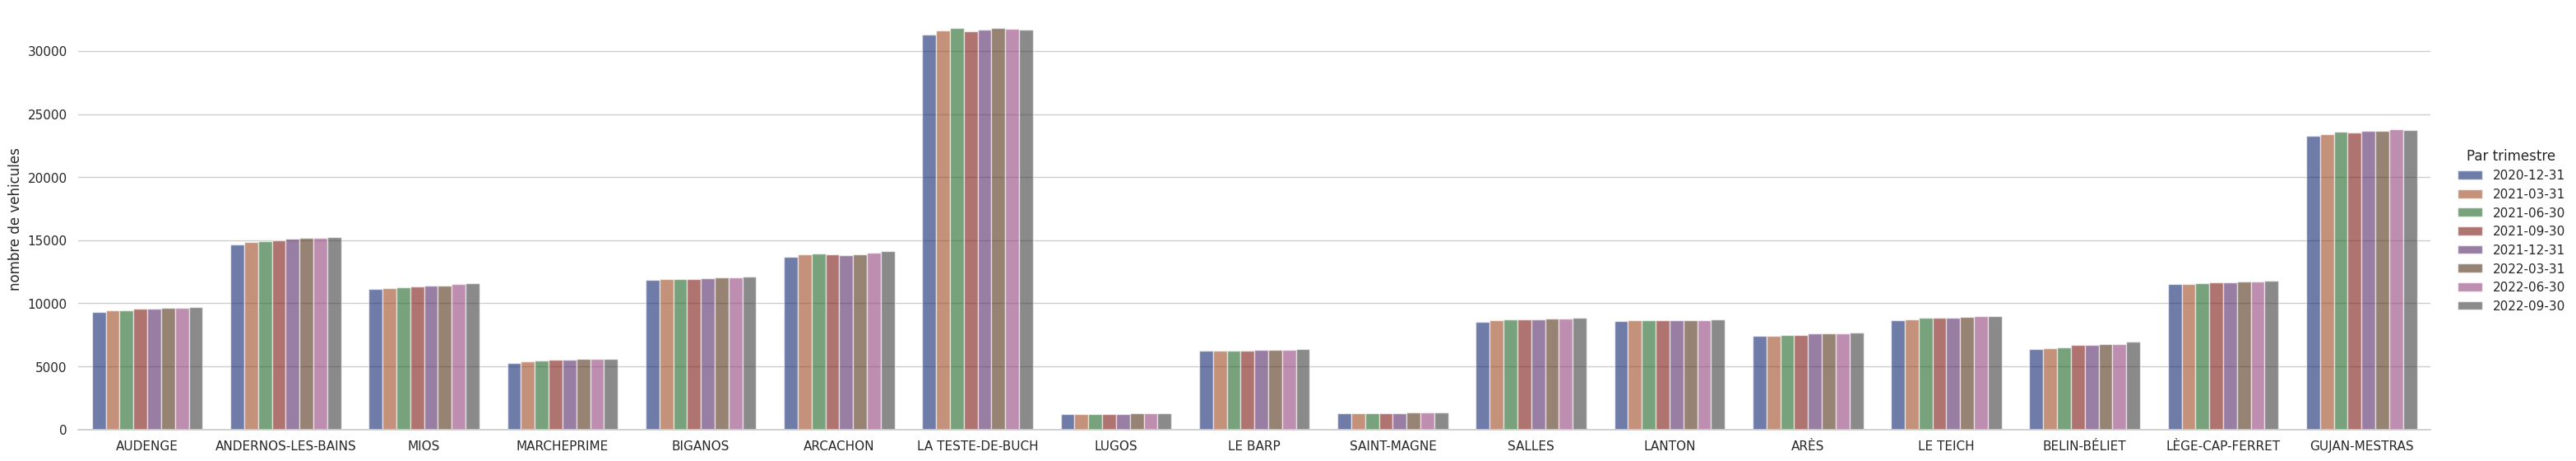

In [33]:
g = sns.catplot(
    data=df_sybarval, kind="bar",
    x="libgeo", y="nb_vp", hue="date_arrete",
    errorbar="sd", palette="dark", alpha=.6, height=6,
    aspect=5
)
g.despine(left=True)
g.set_axis_labels("", "nombre de vehicules")
g.legend.set_title("Par trimestre")


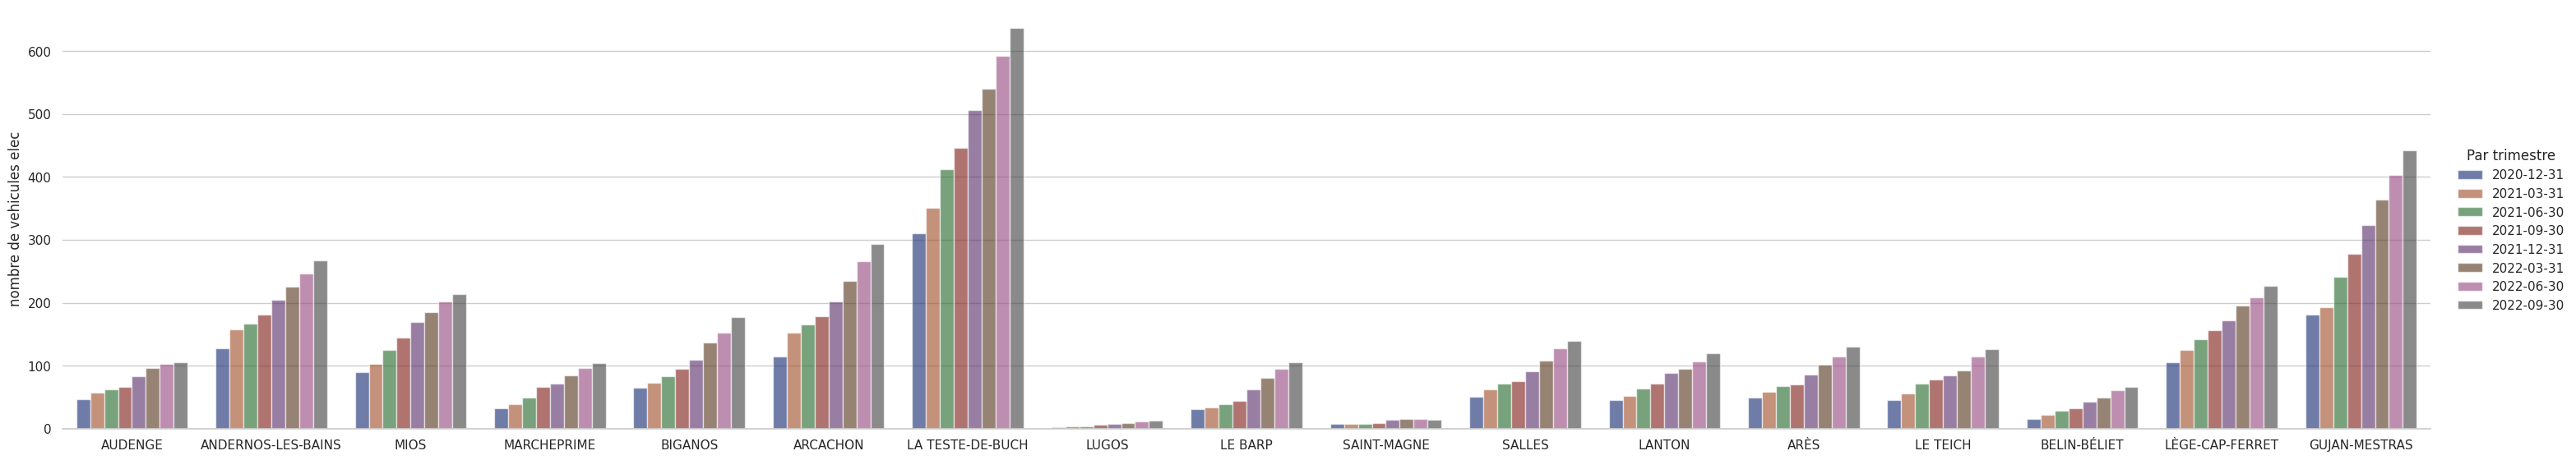

In [34]:
g = sns.catplot(
    data=df_sybarval, kind="bar",
    x="libgeo", y="nb_vp_rechargeables_el", hue="date_arrete",
    errorbar="sd", palette="dark", alpha=.6, height=6,
    aspect=5
)
g.despine(left=True)
g.set_axis_labels("", "nombre de vehicules elec")
g.legend.set_title("Par trimestre")

In [36]:
df_sybarval_2022_09_30=df_sybarval[df_sybarval["date_arrete"]=="2022-09-30"]

In [46]:
df_sybarval_2022_09_30.loc["elec_pct"] = df_sybarval_2022_09_30["nb_vp_rechargeables_el"]/df_sybarval_2022_09_30["nb_vp"]*100
df_sybarval_2022_09_30


,nb_vp_rechargeables_gaz,codgeo,date_arrete,epci,nb_vp_rechargeables_el,libgeo,nb_vp,libepci,geometry,elec_pct
281153,1.0,33019,2022-09-30,243301504,106.0,AUDENGE,9683.0,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-0.83743 44.73709, -0.83756 44...",1.094702
281177,0.0,33029,2022-09-30,243301405,105.0,LE BARP,6351.0,CC du Val de l'Eyre,"MULTIPOLYGON (((-0.71400 44.56619, -0.71909 44...",1.653283
83573,0.0,33260,2022-09-30,243301405,13.0,LUGOS,1293.0,CC du Val de l'Eyre,"MULTIPOLYGON (((-1.02920 44.42276, -1.00735 44...",1.005414
281137,0.0,33011,2022-09-30,243301504,130.0,ARÈS,7662.0,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-1.04060 44.84885, -1.00647 44...",1.696685
83622,0.0,33284,2022-09-30,243301504,214.0,MIOS,11579.0,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-0.88368 44.66957, -0.88235 44...",1.848173
84275,0.0,33527,2022-09-30,243300563,126.0,LE TEICH,8984.0,CA Bassin d'Arcachon Sud-Pôle Atlantique (COBAS),"MULTIPOLYGON (((-1.01118 44.51025, -1.01953 44...",1.402493
148348,2.0,33529,2022-09-30,243300563,637.0,LA TESTE-DE-BUCH,31720.0,CA Bassin d'Arcachon Sud-Pôle Atlantique (COBAS),"MULTIPOLYGON (((-1.25388 44.57180, -1.24931 44...",2.008197
84355,0.0,33555,2022-09-30,243301504,104.0,MARCHEPRIME,5616.0,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-0.90670 44.69972, -0.89620 44...",1.851852
281115,0.0,33005,2022-09-30,243301504,267.0,ANDERNOS-LES-BAINS,15220.0,CA du Bassin d'Arcachon Nord,"MULTIPOLYGON (((-1.04112 44.78282, -1.04569 44...",1.754271
147497,0.0,33199,2022-09-30,243300563,442.0,GUJAN-MESTRAS,23753.0,CA Bassin d'Arcachon Sud-Pôle Atlantique (COBAS),"MULTIPOLYGON (((-1.08507 44.53237, -1.08544 44...",1.860818


Text(0.5, 1.0, 'Percentage de voiture electrique')

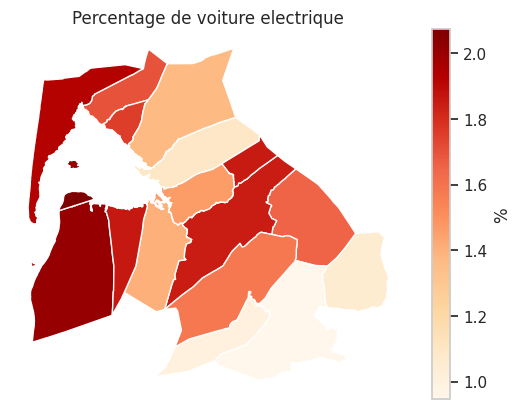

In [47]:
ax = df_sybarval_2022_09_30.plot(
    'elec_pct', legend=True,
    legend_kwds={'label': "%", 'orientation': "vertical"},
    cmap='OrRd',
)
ax.set_axis_off()
ax.set_title("Percentage de voiture electrique")